1. 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction 각각의 개념을 알고, y에 가까운 prediction을 낼 수 있도록 학습한다는 철학을 이해한다.

2. 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류와 구현을 익힌다.

3. 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행해본다.

4. 손실함수를 정의하고 경사하강법을 활용해 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익힌다.

5. sklearn의 LinearRegression을 활용해 빠르고 간편하게 선형 회귀 하는 방법을 익힌다

In [2]:
from IPython.display import display, Image
print("슝=3")

슝=3


### 맥북 중고 가격 맞춰보기
데이터셋 가져와서 두 변수 간의 상관 관계 파악

In [3]:
import pandas as pd

In [4]:
macbook=pd.read_csv('~/aifell/node/221104_exploration_bike/macbook_data/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina' #더 높은 헤상도로 출력


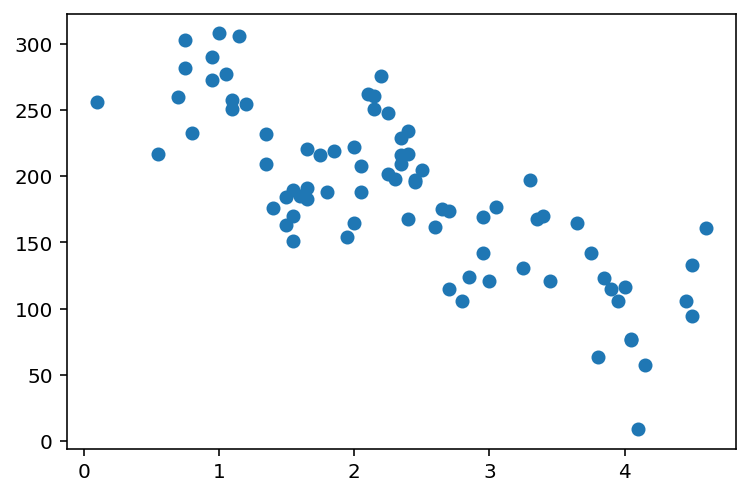

In [6]:
#데이터 시각화
plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

#### 상관관계
관계된 정도는 '피어슨 상관 계수' 로 표현할 수 있음

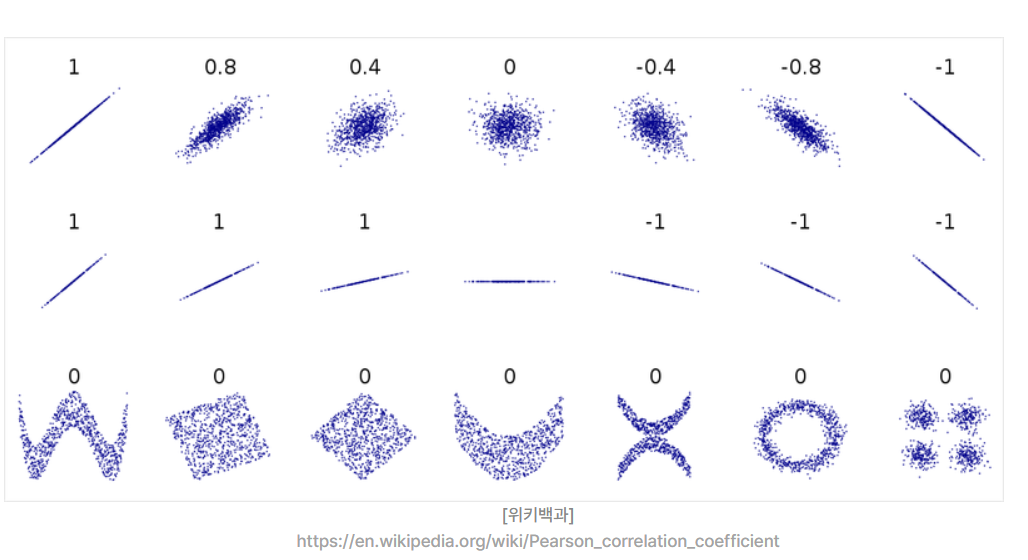

상관 관계가 강하면 상관계수의 절대값 커짐

상관 계수 0: 관계 없음, 데이터 분포가 넓게 퍼지고 
원에 가까워짐

상관 계수 1: 분포 비례,직선 형태

상관 계수 -1: 반비례



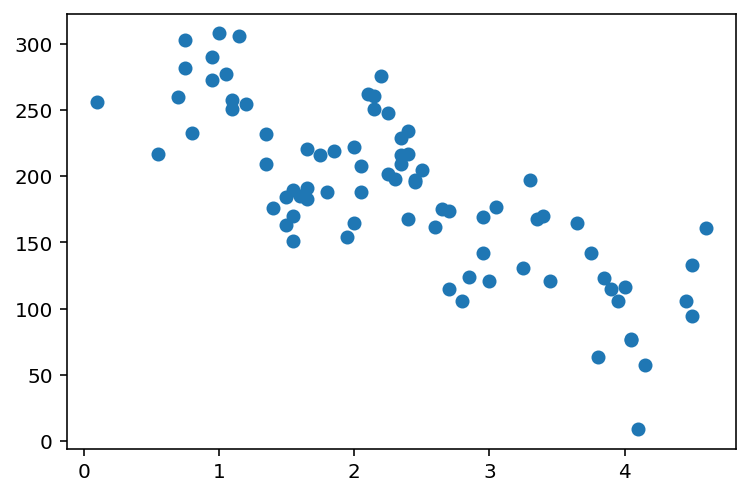

In [7]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show() #음의 상관관계

#### 상관 계수 구해보기 
np.corrcoef(x,y)

In [8]:
import numpy as np

np.corrcoef(macbook['used_years'],macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

(0,0),(1,1) 위치는 자기 자신과의 상관 계수여서 항상 1

결론적으로 -0.79 음의 상관 계수

#### 모델 
특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수 


사용연수 : 입력값
중고 가 : 출력 

In [9]:
x=macbook["used_years"].values
y=macbook["price"].values

#기울기 w, y 절편 b
def model(x,w,b):
    y=w*x+b
    return y


In [10]:
model(x=5,w=2,b=1)

11

##### 모델 학습 
모델이 입력을 받았을 떄 정답값에 가까운 출력을 낼수 있는 최적의 매개변수 혹은 파라미터를 찾는다 

AttributeError: module 'matplotlib.pyplot' has no attribute 'showO'

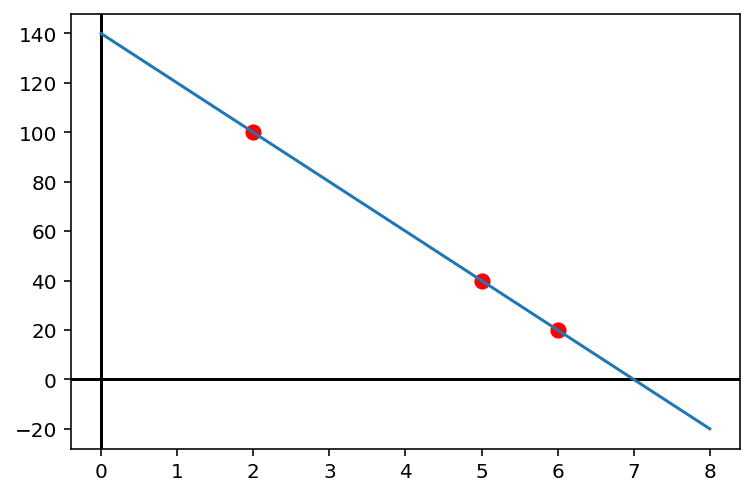

In [11]:
#x축, y축 그리기
plt.axvline(x=0,c='black')
plt.axhline(y=0,c='black')

#y=wx+b 일차함수 그리기
x=np.linspace(0,8,9)
y=model(x,w=-20,b=140)
plt.plot(y)

#나의 x,y ㅉ긱기
x_data=[2,5,6]
y_data=[100,40,20]
plt.scatter(x_data,y_data,c='r',s=50)

plt.showO

하지만 위와 같은 그래프는 거의 불가능 
현실에서는 데이터도 많아서 더 복잡 

그렇기에 최소한의 오차를 낼 수 있는 함수 찾기
w,b 최적의 매개변수, 파라미터, 가중치 찾기 

#### 손실함수
불안전한 현재의 모델이 출력하는 값과 실제 정답간의 차이


1) 모델이 출력하는 값과 실제 정답 간의 차이
2) 그 차이를 단계적으로 줄여나가는 순서로 학습

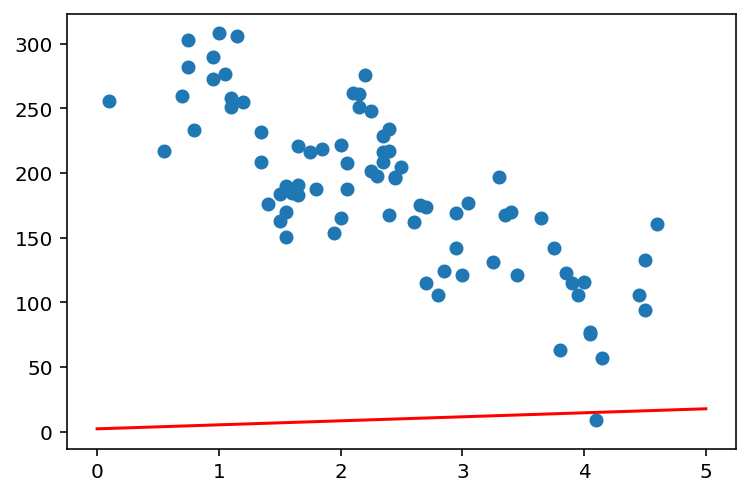

In [12]:
w=3.1
b=2.3

x=np.linspace(0,5,6)
y=model(x,w,b)
plt.plot(y,c='r')

plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

In [13]:
x=macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [14]:
prediction=model(x,w,b) #현재 w=3.1, b=2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [15]:
macbook['prediction']=prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


실제 정답과는 사실 차이가 남 

#### 정답과 예측값 간의 차이

In [16]:
macbook['error']=macbook['price']-macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


#### 에러를 제곱해서 모델의 오차 측정

1. MAE : Mean Absolute Error, 오차의 절댓값의 평균

2. MSE : Mean Squared Error, 오차의 제곱의 평균

3. RMSE : Root Mean Squared Error, MSE의 제곱근

4. R-squared : Coefficient of Determination, 결정 계수

In [17]:
#rmse, mse는 제곱된 오차들의 평균이기 때문에 그 값의 단위를 원래 정답값과 맞춰주기 위해 제곱긍ㄹ 씌움

def rmse(a,b):
    mse=((a - b) ** 2).mean() #두 값의 차이의 제곱의 평균
    rmse=mse ** 0.5
    return rmse


In [18]:
x=macbook['used_years'].values
y=macbook['price'].values

predictions=model(x,w,b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [19]:
rmse=rmse(predictions,y)
rmse

188.81322969819274

모델의 예측값과 정답값에 대한 차이를 계산하는 함수
손실함수, 비용 함수

손실값이 크다 : 모델의 정답과 먼 예측을 함
손실값이 작다 : 모델의 정답과 가까운 예측 

In [20]:
def loss(x,w,b,y):
    predictions=model(x,w,b)
    L=rmse(predictions,y)
    return L

#### 손실함수 : 모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수

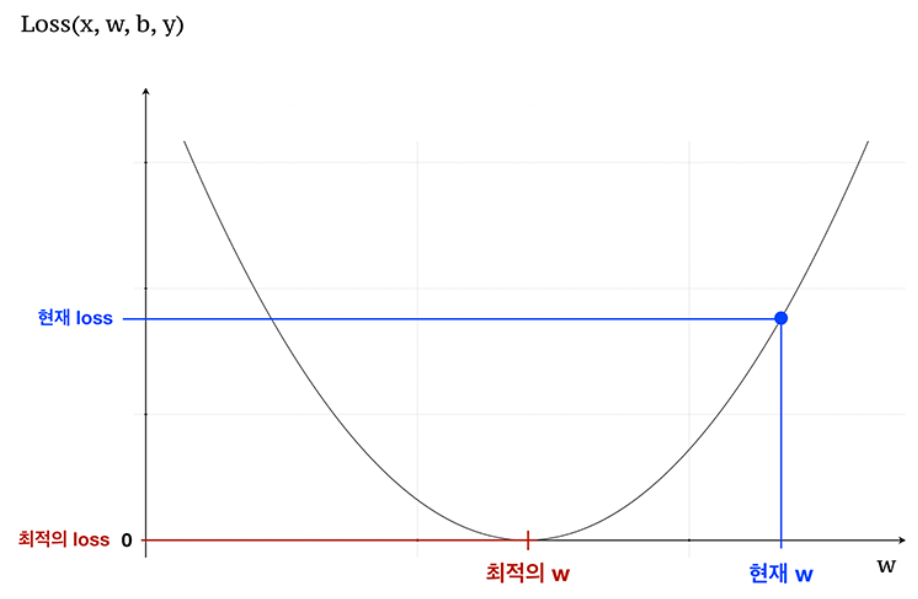


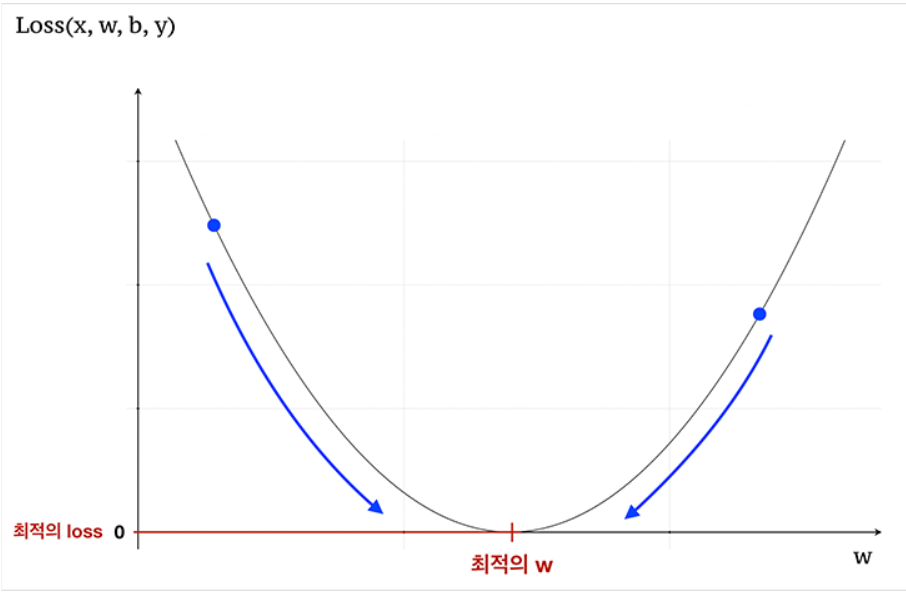

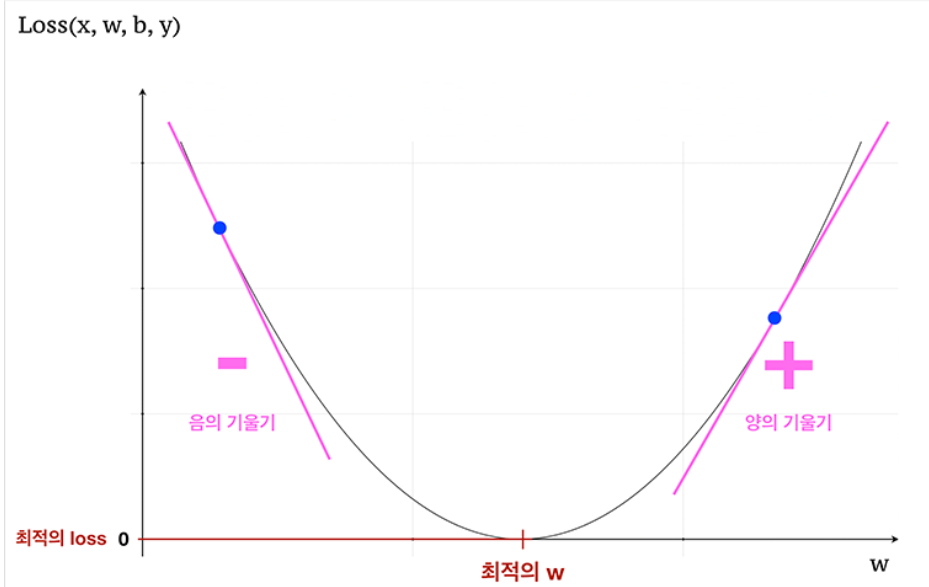


현재 점(w)이 어디에 있는지를 모르므로 기울기를통해 어디로 향해야 하는지 알 수 있음

왼쪽 점은 자기 자신의 위치보다 오른쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 오른쪽 아래로 향하는 방향 이고, 그 기울기는 음수 입니다.

오른쪽 점은 자기 자신의 위치보다 왼쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 왼쪽 아래로 향하는 방향이고, 그 기울기는 양수 입니다.

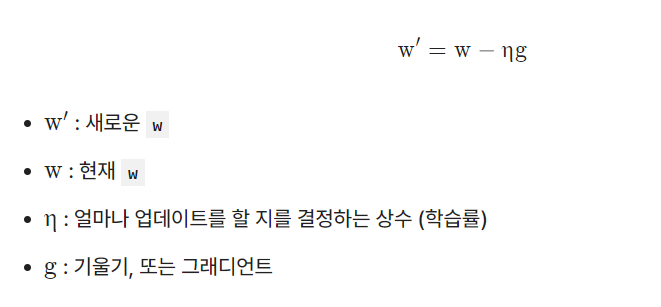

g 가 음수라면 w 가 양수 
g 가 양수라면 w 가 음수 (작아짐)

n은 w를 변화시키는 양 조절, 배율 조절

#### 경사하강 -> 기울기를 사용해서 점차적으로 매개변수를 업데이트하는 방식 

In [21]:
# 기울기를 구하기 위해 미분 계수

def gradient(x,w,b,y):
    dw=(loss(x,w+0.0001,b,y)-loss(x,w,b,y)) / 0.0001
    db=(loss(x,w,b+0.0001,y))-loss(x,w,b,y) / 0.0001

In [22]:
#경사 하강법에 필요한학습률 n 상수
learning_rate=1

#하이퍼 파라미터 : 사람이 직접 사전에 정하고 시작해야하는 파라미터

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 w'=w-\eta gw 
′
 =w−ηg , b'=b-\eta gb 
′
 =b−ηg 로 업데이트
3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

In [23]:
import numpy as np

def rmse(a,b):
    mse=((a - b) ** 2).mean() #두 값의 차이의 제곱의 평균
    rmse=mse ** 0.5
    return rmse

def loss(x,w,b,y):
    predictions=model(x,w,b)
    L=rmse(predictions,y)
    return L

def gradient(x,w,b,y):
    dw=(loss(x,w+0.0001,b,y)-loss(x,w,b,y)) / 0.0001
    db=(loss(x,w,b+0.0001,y)-loss(x,w,b,y)) / 0.0001
    return dw, db
    
x=macbook['used_years'].values
y=macbook['price'].values

#랜덤 w b
w=3.1
b=2.3

#손실함수 값이 단계별로 얼마정도 인지 저장
losses=[]

#학습
for i in range(1,2001):
    dw, db=gradient(x, w, b, y) 
    w-=learning_rate*dw
    b-=learning_rate*db
    L=loss(x,w,b,y)
    losses.append(L)
    if i%100 ==0:
        print("iteration %d : loss %0.4f" % (i,L))

iteration 100 : loss 108.0080
iteration 200 : loss 94.5709
iteration 300 : loss 81.8560
iteration 400 : loss 70.1799
iteration 500 : loss 59.9778
iteration 600 : loss 51.7475
iteration 700 : loss 45.8356
iteration 800 : loss 42.1474
iteration 900 : loss 40.1357
iteration 1000 : loss 39.1420
iteration 1100 : loss 38.6793
iteration 1200 : loss 38.4703
iteration 1300 : loss 38.3772
iteration 1400 : loss 38.3360
iteration 1500 : loss 38.3179
iteration 1600 : loss 38.3099
iteration 1700 : loss 38.3064
iteration 1800 : loss 38.3048
iteration 1900 : loss 38.3041
iteration 2000 : loss 38.3038


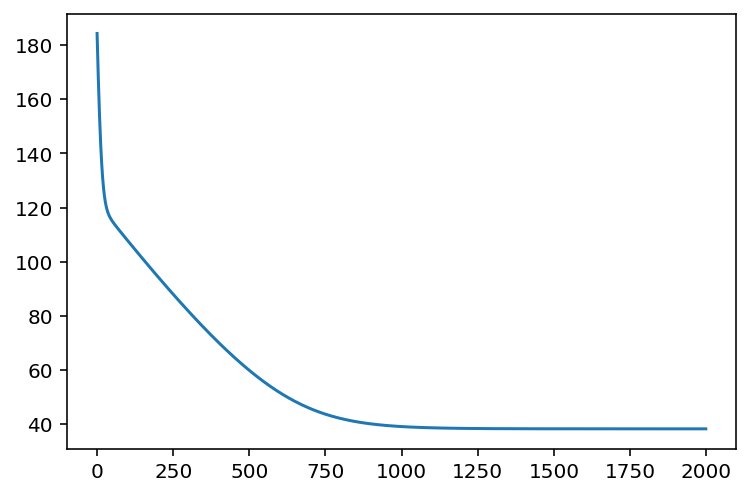

In [24]:
plt.plot(losses)
plt.show()

In [25]:
w,b

(-44.92756090768412, 293.0815786721102)

NameError: name 'show' is not defined

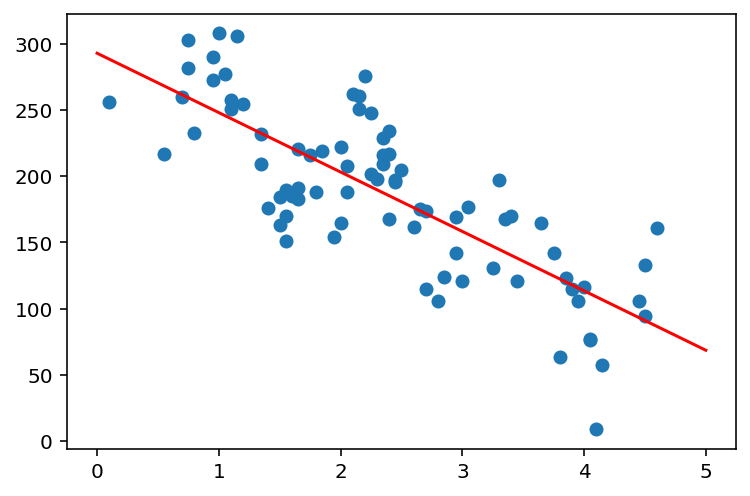

In [26]:
#데이터 학습이 완료된 모델, 일차 함수

#모델에 넣을 x 값들준비
x=np.linspace(0,5,6)

# x, w, b를 모델에 넣어 y값 출력
y=model(x,w,b)

#일차함수 그리기
plt.plot(y,c='r')

#원본 데이터 그리기
plt.scatter(macbook['used_years'],macbook['price'])
plt,show()

In [27]:
test=pd.read_csv('~/aifell/node/221104_exploration_bike/macbook_data/data/macbook_test.csv')
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [28]:
#새로운 데이터로 학습 

test_x=test['used_years'].values
test_y=test['price'].values

In [29]:
prediction=model(test_x,w,b)
test['prediction']=prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [30]:
test['error']=test['price']-test['prediction']

test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [31]:
rmse=((test['error']**2).sum()/len(test))**0.5
rmse

45.03918284717212

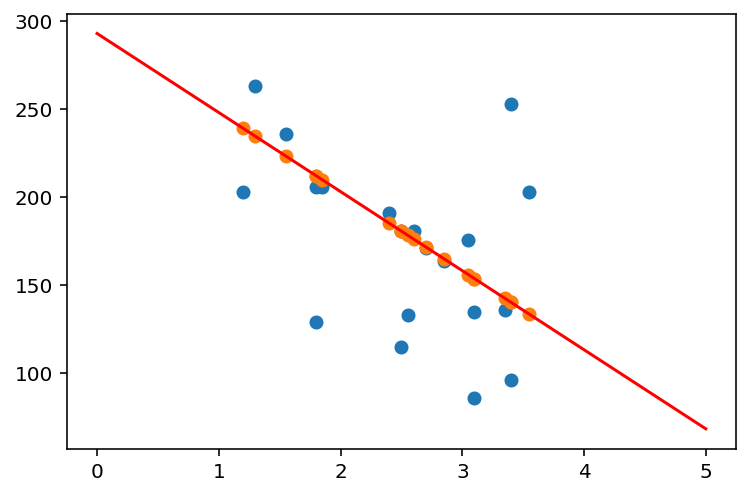

In [32]:
#모델 일차함수 그리기
x=np.linspace(0,5,6)
y=model(x,w,b)
plt.plot(y,c='r')

#실제 데이터값
plt.scatter(test['used_years'],test['price'])

#모델이 예측한 값
plt.scatter(test['used_years'],test['prediction'])

plt.show()

#### 손님의 성별, 먹은 수 , 전체 먹은 금액 등으로 내가 받을팁을 예측할 수 있을까?

seaborn 패키지: matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지지만, 간단하고 가벼운 그래프에 최적화/

In [33]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [35]:
#데이터 로드
tips=sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
#문자열의 데이터가 있어 실수로 값을 변경 
#pandas의 함수 사용하여 문자열에 대해 카테고리형 데이터는 더미 변수로 활용 

import pandas as pd
tips=pd.get_dummies(tips,columns=['sex', 'smoker', 'day', 'time'])
tips.head()


,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [37]:
#최종적으로 tip값을 예측, tip 컬럼을 맨 오른쪾에 둠
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


#### 선형 회귀 

다변수 일차 방정식= 선형 방정식 
- 각각 x에 개별 가중치를 곱해주는 것 말고 다른 조작을 하지 않는다

- 회귀 : 연속된 실수값에 예측하는 문제

- 분류 : 맞히고자 하는 값이 카테고리

##### 다변수 데이터에 대해 선형회귀

In [38]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [95]:
#train test 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [96]:
#12개의 벡터 W 필요, 변수가 12개

import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")
w

슝=3


array([0.61340033, 0.18438804, 0.74058341, 0.60771506, 0.01066299,
       0.71799917, 0.97647525, 0.79795073, 0.19300031, 0.08154652,
       0.93678646, 0.43947727])

In [41]:
b

0.8817392845469975

In [97]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [98]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [99]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


In [100]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * (X.T).dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [101]:
dw, db=gradient(X,w,b,y)
print('dw:', dw)
print('db:',db)

dw: [11199.34165808  1349.08065008   323.34585568   160.64322493
   186.15375594   297.83532467   121.86588648    33.55741756
   172.28316489   156.28261168   129.86520373   354.12387688]
db: 23.80274166922474


In [102]:
learning_rate=0.0001

In [104]:
losses=[]

for i in range(1,1001):
    dw, db=gradient(X_train,w,b,y_train)
    w-=learning_rate*dw
    b-=learning_rate*db
    L=loss(X_train,w,b,y_train)
    losses.append(L)
    if i % 10==0:
        print('iteration:%d Loss %0.04f' % (i,L))

iteration:10 Loss 1.9363
iteration:20 Loss 1.9049
iteration:30 Loss 1.8752
iteration:40 Loss 1.8470
iteration:50 Loss 1.8202
iteration:60 Loss 1.7947
iteration:70 Loss 1.7705
iteration:80 Loss 1.7476
iteration:90 Loss 1.7257
iteration:100 Loss 1.7049
iteration:110 Loss 1.6851
iteration:120 Loss 1.6662
iteration:130 Loss 1.6482
iteration:140 Loss 1.6311
iteration:150 Loss 1.6147
iteration:160 Loss 1.5991
iteration:170 Loss 1.5842
iteration:180 Loss 1.5700
iteration:190 Loss 1.5564
iteration:200 Loss 1.5434
iteration:210 Loss 1.5310
iteration:220 Loss 1.5191
iteration:230 Loss 1.5077
iteration:240 Loss 1.4968
iteration:250 Loss 1.4863
iteration:260 Loss 1.4763
iteration:270 Loss 1.4667
iteration:280 Loss 1.4575
iteration:290 Loss 1.4486
iteration:300 Loss 1.4401
iteration:310 Loss 1.4319
iteration:320 Loss 1.4240
iteration:330 Loss 1.4164
iteration:340 Loss 1.4091
iteration:350 Loss 1.4021
iteration:360 Loss 1.3953
iteration:370 Loss 1.3888
iteration:380 Loss 1.3825
iteration:390 Loss 1.

In [87]:
(X_train.T).shape

(12, 195)

In [89]:
y_train.shape

(195,)

In [93]:
a=model(X_train, w, b)

a.shape

(244,)

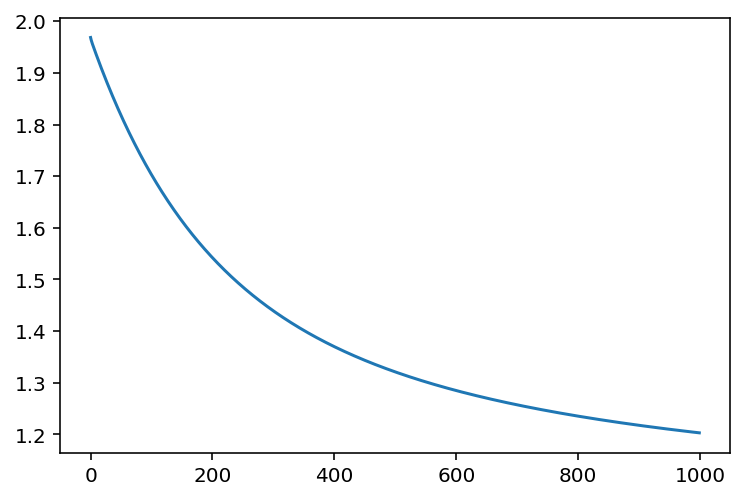

In [105]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [106]:
w,b

(array([ 0.08892334, -0.02718848,  0.46934335,  0.355561  , -0.04403869,
         0.24930672,  0.47521362,  0.6587736 ,  0.15902745,  0.23256401,
         0.38050806,  0.47236155]),
 0.13276886565537058)

In [109]:
#학습하지 않은 teset데이터에 대해서 loss 값

prediction=model(X_test,w,b)
mse=loss(X_test,w,b,y_test)
mse

0.7193553860074171

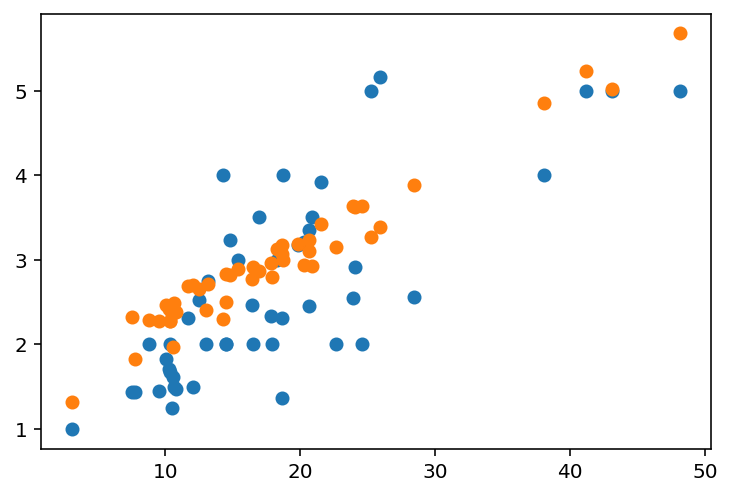

In [110]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

지금까지 한 모든 값을 깨끗하게

In [111]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

슝=3


In [112]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [114]:
from sklearn.linear_model import LinearRegression
#선형 회귀 모델

model = LinearRegression()
print("슝=3")

슝=3


In [115]:
model.fit(X_train,y_train)

LinearRegression()

In [116]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [117]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436101

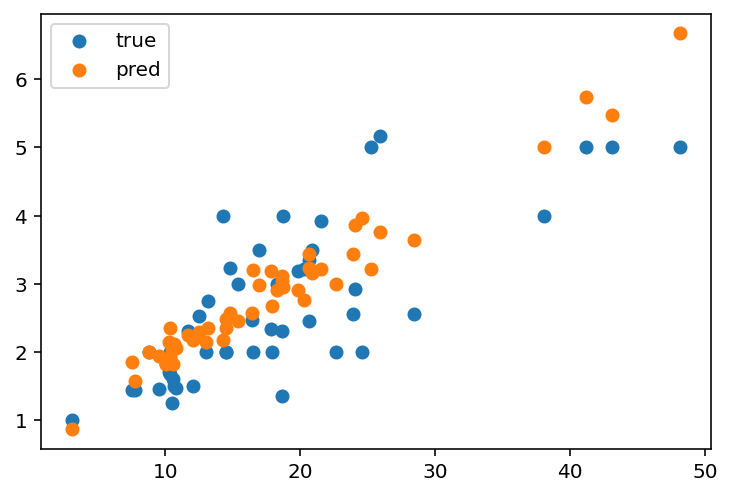

In [118]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()